#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données : feuille 3
### Régression linéaire simple et multiple

##### Avant de commencer :

Le régression linéaire est l'une des méthodes statistiques les plus utilisées en sciences de données. Elle est utilisée pour <em>prédire</em> les valeurs d'une variable <em>dépendante</em> continue en fonction d'une ou plusieurs variables <em>indépendantes</em>.


In [1]:
import pandas as pa

### Exercice 1. Régression linéaire simple.

La gérante d’un commerce veut évaluer l’impact des frais déboursés en publicité par mois (représentés par une variable $X$ exprimée en milliers d’euros) sur le chiffre d’affaires mensuel (représenté par une variable $Y$ exprimée en milliers d’euros). On aimerait évaluer dans quelle mesure une modification du budget publicitaire mensuel affecterait le chiffre d’affaires mensuel. On a donc recueilli sur une période de 10 mois les données du tableau ci-dessous.

<table>
<tr><td>Chiffre d'affaires</td> <td>220</td> <td>280</td> <td>250</td> <td>170</td> <td>150</td> <td>340</td> <td>310</td> <td>210</td> <td>180</td> <td>190</td></tr>
<tr><td>Frais publicitaires</td> <td>2.6</td> <td>2.6</td> <td>2.4</td> <td>1.5</td> <td>0.9</td> <td>3.0</td> <td>2.7</td> <td>2.3</td> <td>1.7</td> <td>1.9</td></tr>

</table>    

1. Créer un <code>DataFrame</code> contenant les données du tableau ci-dessus.

In [ ]:
dic = {"CA" : (220, 280, 250, 170, 150, 340, 310, 210, 180, 190),
       "Frais" : (2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9)}
df = pa.DataFrame(data=dic)
df.head()

,CA,Frais
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9


2. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.

In [3]:
import matplotlib.pyplot as plt

X = df["Frais"]
Y = df["CA"]

coefficient de corrélation linéaire : 2.1551564302304898


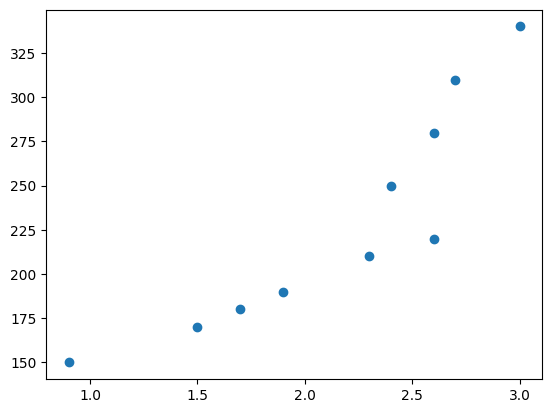

In [35]:
from scipy import stats

plt.scatter(X, Y)
X_mean = X.mean()
Y_mean = Y.mean()
num = ((X - X_mean) * (Y - Y_mean)).sum()
den = ((((X - X_mean) ** 2) * ((Y - Y_mean) ** 2)).sum()) ** 0.5
coeff = num/den
print("coefficient de corrélation linéaire :", coeff)

plt.show()


3. Etablir la droite de régression correspondant à ce problème et tracer cette droite. Vous pouvez utiliser l'instruction <code>linregress</code> du module <code>stats</code>

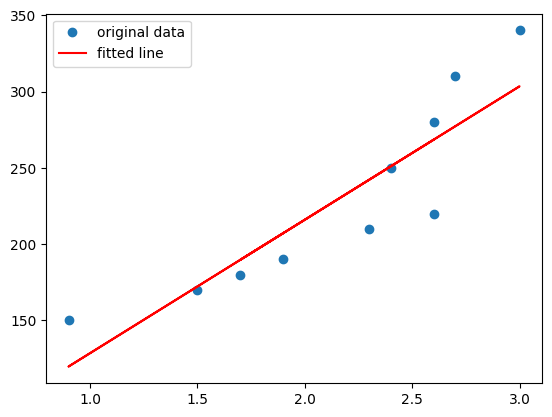

In [36]:
res = stats.linregress(X, Y)

plt.plot(X, Y, 'o', label = "original data")
plt.plot(X, res.intercept + res.slope * X, 'r', label = "fitted line")
plt.legend()
plt.show()

4. Tester la significativité de la régression au risque 5%.

In [37]:
print("p-value :", res.pvalue)

p-value : 0.0004894341749604697


5. Calculer le coefficient de détermination.

In [38]:
Y_mean = Y.mean()
SCT = ((Y - Y_mean) ** 2).sum()
SCE = (((res.intercept + res.slope * X) - Y_mean) ** 2).sum()
SCR = ((Y - (res.intercept + res.slope * X)) ** 2).sum()

print("SCT :", SCT)
print("SCE :", SCE)
print("SCR :", SCR)
print("my r-value : ", (SCE/SCT))
print("my r-value 2:", 1 - (SCR/SCT))
print("r-value :    ", res.rvalue ** 2)


SCT : 36000.0
SCE : 28756.90754516471
SCR : 7243.092454835274
my r-value :  0.7988029873656864
my r-value 2: 0.7988029873656868
r-value :     0.7988029873656866


6. Quel serait le chiffre d’affaires mensuel prédit par le modèle pour un budget publicitaire mensuel de 400 euros ? de 4000 euros ?

In [51]:
print(res.slope * .4 + res.intercept)
print(res.slope * 1.5 + res.intercept)
print(res.slope * 4 + res.intercept)

76.16365568544109
172.31137088204042
390.8289054197662


### Exercice 2. Régression linéaire multiple

Nous voulons savoir quels sont les facteurs importants qui influencent la valeur d’une propriété. L'objectif est de construire un modèle qui nous aidera à évaluer cette valeur selon ces facteurs. Pour ce faire, nous utilisons la valeur totale pour un échantillon de 79 propriétés dans une région donnée. Voir le fichier <code>proprietes.csv</code> disponible à l’adresse :

http://www.labri.fr/~zemmari/datasets/proprietes.csv

Le fichier contient les variables suivantes correspondant chacune à un facteur : 
- Valeur Totale : valeur globale de la propriété
- Valeur Terrain : valeur du terrain sur lequel est bâtie la maison
- Acre : Superficie en acres
- Pieds2 : Superficie en pieds2
- Extérieur : Etat extérieur
- Chauffage : Type du chauffage utilisé
- Pièces : Nombre de pièces dans la maison
- Chambres : Nombre de chambres dans la maison
- SbainsC : Nombre de salles de bain complètes
- Sbains : Nombre de salles de bain non complètes
- Foyers : Nombre de foyers
- Garage : Indique si la propriété contient un garage ou non.

Après avoir chargé les données dans un DataFrame vous pouvez visualiser les premières entrées avec la fonction head et inspecter globalement les données avec la fonction info. Y a-t-il des données manquantes?

In [65]:
from pandas import read_csv

data = read_csv("proprietes.csv", sep=';').select_dtypes(include="number")
data.head(10)

,Valeur Totale,Valeur Terrain,Pied2,Pièces,Chambre,SbainsC,Sbains,Foyers
0,199657,63247,1726,8,4,2,1,2
1,78482,38091,1184,6,2,1,0,0
2,119962,37665,1014,7,3,2,0,1
3,116492,54062,1260,6,3,2,0,1
4,131263,61546,1314,8,4,2,1,2
5,244128,97177,1040,10,5,3,0,1
6,240777,83702,1752,9,4,3,2,3
7,381984,84504,2504,9,4,3,2,2
8,137275,88754,708,8,4,1,0,0
9,131625,58480,1776,7,3,7,1,2


1. Y a-t-il un lien entre la valeur totale et les différents facteurs ?

In [66]:
'¯\_(ツ)_/¯'

'¯\\_(ツ)_/¯'

2. Afficher les valeurs des différentes statistiques desciptives.

In [70]:
from statsmodels.regression.linear_model import OLS
X = data[["Valeur Terrain", "Pied2", "Pièces", "Chambre", "SbainsC", "Sbains", "Foyers"]]
Y = data["Valeur Totale"]
model = OLS(Y,X)
results = model.fit()
report = results.summary()
report

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Valeur Totale   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              400.2
Date:                Wed, 01 Oct 2025   Prob (F-statistic):                    5.72e-55
Time:                        12:02:57   Log-Likelihood:                         -932.78
No. Observations:                  79   AIC:                                      1880.
Df Residuals:                      72   BIC:                                      1896.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Valeur Terrain     1.5608      0.218      7.174      0.000       1.127       1.994
Pied2             47.0670      7.881      5.972      0.000      31.356      62.779
Pièces         -9119.9321   3285.492     -2.776      0.007   -1.57e+04   -2570.424
Chambre         1.006e+04   6020.740      1.670      0.099   -1946.373    2.21e+04
SbainsC         1.071e+04   4071.081      2.631      0.010    2593.810    1.88e+04
Sbains          2.769e+04   7158.494      3.868      0.000    1.34e+04     4.2e+04
Foyers          1264.6186   3644.700      0.347      0.730   -6000.958    8530.195
==============================================================================
Omnibus:                        5.331   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.562
Skew:                           0.091   Prob(JB):                       0.0228
Kurtosis:                       4.505   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. Faites les différentes régressions linéaires simples possibles, et choisissez la (ou les) plus pertinente(s).

In [71]:
import matplotlib as plt
plt.plot(X, Y)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

4. Faites la régression multiple de la Valeur totale en fonction des autres facteurs (quand c’est possible). Analysez les résultats obtenus.  Appuyez vous sur l'exemple vu en cours pour la méthode à suivre et l'utilisation de bibliothèques.